In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
zo_opt_file = "ZO_opt.csv"
hybrid_file = "Hybrid.csv"
peft_file = "PEFT.csv"
mem_file = "Mem_usage.csv"

In [4]:
zo_opt_df = pd.read_csv(zo_opt_file).dropna(how='all')
hybrid_df = pd.read_csv(hybrid_file).dropna(how='all')
peft_df = pd.read_csv(peft_file).dropna(how='all')
mem_df = pd.read_csv(mem_file).dropna(how='all')

In [5]:
SMALL_MODELS = ("RoBERTa-Base", "RoBERTa-large", "RoBERTa-large ")
MEDIUM_MODELS = ("OPT-1.3B", "OPT-2.7B")
LARGE_MODELS = ("LLaMA-7b", "LLaMA2-7b", "LlaMA3-8b", "OPT-13B")

In [6]:
TASK_TYPE_TO_DATASET = {"Natural Language Inference": ("SNLI", "MNLI", "RTE", "CB"),
                        "Sentiment Analysis": ("SST-2", "SST-5"),
                        "Reading Comprehension/Question Answering": ("SQuAD", "MultiRC", "ReCoRD", "DROP", "BoolQ"),
                        "Commonsense & Causal Reasoning": ("COPA", "WSC"),
                        "Word Sense/Contextual Meaning": ("WIC"),
                        "Question Classification": ("TREC")}

/tmp/ipykernel_1462/717187794.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')
/tmp/ipykernel_1462/717187794.py:27: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate()
/tmp/ipykernel_1462/717187794.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')
/tmp/ipykernel_1462/717187794.py:27: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate()
/tmp/ipykernel_1462/717187794.py:26: FutureWarning: DataFrame.fillna with 'metho

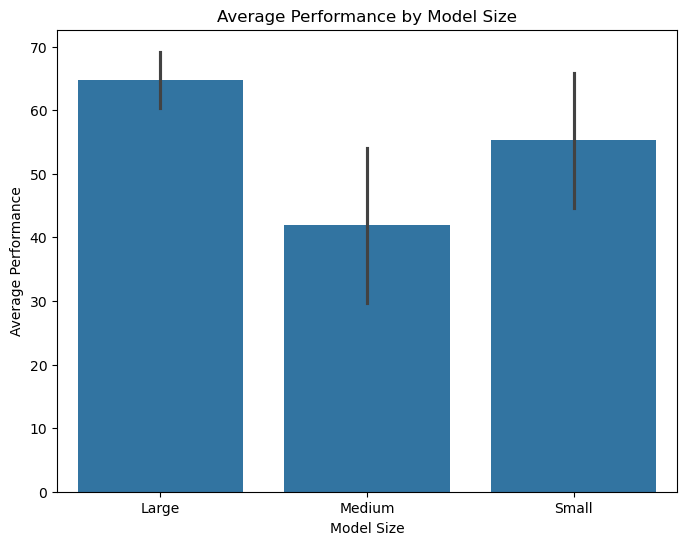

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# File paths for performance CSVs
zo_opt_file = "ZO_opt.csv"
hybrid_file = "Hybrid.csv"
peft_file = "PEFT.csv"

# Read CSV files and drop rows where all values are NaN
zo_opt_df = pd.read_csv(zo_opt_file).dropna(how='all')
hybrid_df = pd.read_csv(hybrid_file).dropna(how='all')
peft_df = pd.read_csv(peft_file).dropna(how='all')

# Define model size categories
SMALL_MODELS = ("RoBERTa-Base", "RoBERTa-large", "RoBERTa-large ")
MEDIUM_MODELS = ("OPT-1.3B", "OPT-2.7B")
LARGE_MODELS = ("LLaMA-7b", "LLaMA2-7b", "LlaMA3-8b", "OPT-13B")

def clean_dataframe(df):
    """
    Interpolates missing values in a DataFrame.
    First fills leading/trailing NaNs, then interpolates numeric columns.
    """
    df = df.fillna(method='ffill').fillna(method='bfill')
    df = df.interpolate()
    return df

def get_model_size(model_name):
    """
    Returns the model size category for a given model name.
    """
    model_name = model_name.strip()  # remove extra whitespace
    if model_name in SMALL_MODELS:
        return 'Small'
    elif model_name in MEDIUM_MODELS:
        return 'Medium'
    elif model_name in LARGE_MODELS:
        return 'Large'
    else:
        return 'Unknown'

def aggregate_performance(perf_dfs):
    """
    Aggregates performance data from multiple DataFrames.
    
    Args:
        perf_dfs (list): List of DataFrames containing performance metrics.
        
    Returns:
        aggregated (DataFrame): A DataFrame with each model's average performance and its size.
    """
    # Clean all performance dataframes
    perf_dfs = [clean_dataframe(df) for df in perf_dfs]
    
    # Merge performance data on 'Model' column
    merged_perf = perf_dfs[0]
    for df in perf_dfs[1:]:
        merged_perf = pd.merge(merged_perf, df, on='Model', how='outer', suffixes=('', '_dup'))
    
    # Average across all numeric columns (excluding the 'Model' column)
    numeric_cols = merged_perf.select_dtypes(include=[np.number]).columns
    merged_perf['Avg_Performance'] = merged_perf[numeric_cols].mean(axis=1)
    
    # Add model size classification
    merged_perf['Model_Size'] = merged_perf['Model'].apply(get_model_size)
    
    return merged_perf[['Model', 'Avg_Performance', 'Model_Size']]

def visualize_performance(aggregated):
    """
    Visualizes average performance by model size.
    
    Args:
        aggregated (DataFrame): DataFrame with columns ['Model', 'Avg_Performance', 'Model_Size'].
    """
    # Plot average performance by model size using a bar plot
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Model_Size', y='Avg_Performance', data=aggregated, ci='sd')
    plt.title("Average Performance by Model Size")
    plt.xlabel("Model Size")
    plt.ylabel("Average Performance")
    plt.show()

# List of performance DataFrames
performance_dfs = [zo_opt_df, hybrid_df, peft_df]

# Aggregate performance results
aggregated_results = aggregate_performance(performance_dfs)

# Visualize the performance by model size
visualize_performance(aggregated_results)

Stability Statistics by Method Category:
   Method    Variance  Std_Deviation  count
0  Hybrid  362.671166      19.043927     37
1    PEFT   22.030009       4.693614     63
2  ZO_opt    9.046496       3.007739      8


/tmp/ipykernel_1462/3329925494.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')
/tmp/ipykernel_1462/3329925494.py:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate()
/tmp/ipykernel_1462/3329925494.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')
/tmp/ipykernel_1462/3329925494.py:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate()
/tmp/ipykernel_1462/3329925494.py:5: FutureWarning: DataFrame.fillna with 'metho

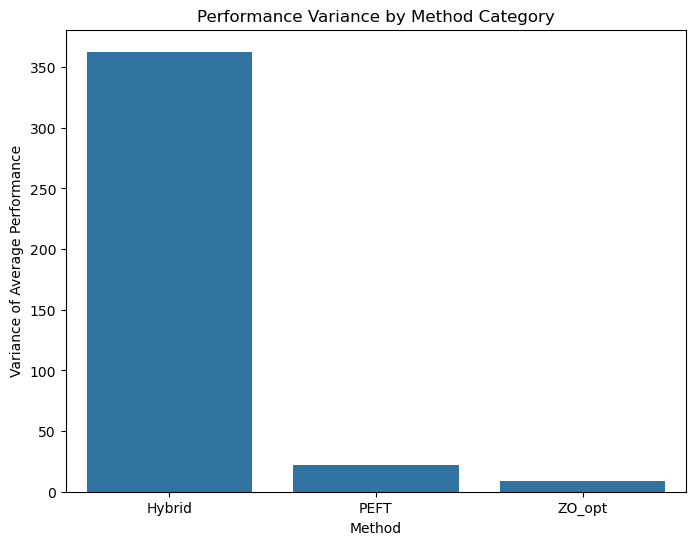

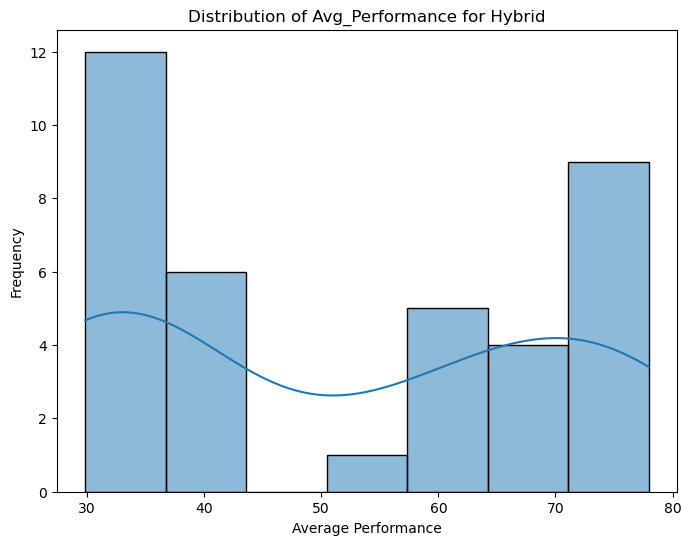

In [10]:
def clean_dataframe(df):
    """
    Interpolates missing values in a DataFrame using forward/backward fill followed by interpolation.
    """
    df = df.fillna(method='ffill').fillna(method='bfill')
    df = df.interpolate()
    return df

def compute_avg_performance(df, use_median=False, filter_zeros=False):
    """
    Computes an average performance score across numeric columns for each row.
    
    Options:
      - use_median: use the median instead of the mean for robust performance aggregation.
      - filter_zeros: remove zeros (or near-zero values) from the calculation if they are considered errors.
    """
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if filter_zeros:
        # Replace zeros with NaN (or filter them out) before computing the statistic.
        df[numeric_cols] = df[numeric_cols].replace(0, np.nan)
    
    if len(numeric_cols) == 0:
        df['Avg_Performance'] = np.nan
    else:
        if use_median:
            df['Avg_Performance'] = df[numeric_cols].median(axis=1, skipna=True)
        else:
            df['Avg_Performance'] = df[numeric_cols].mean(axis=1)
    return df

def prepare_method_df(df, method_name, use_median=False, filter_zeros=False):
    """
    Cleans the DataFrame, computes the average performance (with options), and adds a column for the method.
    """
    df = clean_dataframe(df)
    df = compute_avg_performance(df, use_median=use_median, filter_zeros=filter_zeros)
    df['Method'] = method_name
    return df

# Option to use robust statistics and filter zeros:
USE_MEDIAN = False       # Set to True to use median instead of mean.
FILTER_ZEROS = True      # Set to True to filter out zeros in the computation.

# Prepare each method DataFrame
zo_opt_prepared = prepare_method_df(zo_opt_df, "ZO_opt", use_median=USE_MEDIAN, filter_zeros=FILTER_ZEROS)
hybrid_prepared = prepare_method_df(hybrid_df, "Hybrid", use_median=USE_MEDIAN, filter_zeros=FILTER_ZEROS)
peft_prepared = prepare_method_df(peft_df, "PEFT", use_median=USE_MEDIAN, filter_zeros=FILTER_ZEROS)

# Combine the DataFrames
combined_df = pd.concat([zo_opt_prepared, hybrid_prepared, peft_prepared], ignore_index=True)

def analyze_method_stability(df):
    """
    Analyzes the stability of each method by computing the variance (and standard deviation)
    of the aggregated performance.
    """
    stability_stats = df.groupby('Method')['Avg_Performance'].agg(['var', 'std', 'count']).reset_index()
    stability_stats.rename(columns={'var': 'Variance', 'std': 'Std_Deviation'}, inplace=True)
    return stability_stats

def visualize_stability(stability_df):
    """
    Visualizes the performance variance (instability) across method categories.
    """
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Method', y='Variance', data=stability_df, ci=None)
    plt.title("Performance Variance by Method Category")
    plt.xlabel("Method")
    plt.ylabel("Variance of Average Performance")
    plt.show()

def debug_distribution(df, method_name):
    """
    Plots the distribution of average performance values for a given method to inspect spread.
    """
    method_df = df[df['Method'] == method_name]
    plt.figure(figsize=(8, 6))
    sns.histplot(method_df['Avg_Performance'], kde=True)
    plt.title(f"Distribution of Avg_Performance for {method_name}")
    plt.xlabel("Average Performance")
    plt.ylabel("Frequency")
    plt.show()

# Analyze stability across methods using average performance
stability_results = analyze_method_stability(combined_df)
print("Stability Statistics by Method Category:")
print(stability_results)

# Visualize the stability (variance) for each method category
visualize_stability(stability_results)

# Debug: Check the distribution for the Hybrid method
debug_distribution(combined_df, "Hybrid")
